In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
weather = pd.read_csv('daily_weather_data.csv')
weather.head()

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,21-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,22-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,23-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,24-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,25-07-2018,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0


In [2]:
weather.tail()

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
324642,07-10-2022,Western Sahara,El Aaiún,27.125287,-13.1625,22.1,18.6,25.6,3.0,24.7,1013.7
324643,08-10-2022,Western Sahara,El Aaiún,27.125287,-13.1625,22.1,19.6,25.6,2.0,20.5,1013.0
324644,09-10-2022,Western Sahara,El Aaiún,27.125287,-13.1625,23.4,19.6,29.6,34.0,24.0,1015.4
324645,10-10-2022,Western Sahara,El Aaiún,27.125287,-13.1625,23.1,18.6,29.7,39.0,28.4,1017.6
324646,11-10-2022,Western Sahara,El Aaiún,27.125287,-13.1625,21.4,17.3,27.5,21.0,21.3,1018.6


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324647 entries, 0 to 324646
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       324647 non-null  object 
 1   country    324647 non-null  object 
 2   city       324647 non-null  object 
 3   Latitude   324647 non-null  float64
 4   Longitude  324647 non-null  float64
 5   tavg       314963 non-null  float64
 6   tmin       312284 non-null  float64
 7   tmax       312269 non-null  float64
 8   wdir       283937 non-null  float64
 9   wspd       302400 non-null  float64
 10  pres       289416 non-null  float64
dtypes: float64(8), object(3)
memory usage: 27.2+ MB


In [4]:
weather.isnull().sum()

date             0
country          0
city             0
Latitude         0
Longitude        0
tavg          9684
tmin         12363
tmax         12378
wdir         40710
wspd         22247
pres         35231
dtype: int64

In [5]:
# Converting the 'date' column to datetime
weather['date'] = pd.to_datetime(weather['date'])

#The convention of the weather and climate community has been to calculate the observed daily *mean* temperature by summing the maximum and minimum instantaneous temperatures during a 24-hour period and dividing by two.

# Removing rows with missing values in 'tavg', 'tmin', and 'tmax' if more than one value is missing in the same row
weather.dropna(subset=['tavg', 'tmin', 'tmax'], thresh=2, inplace=True)

# Filling in missing 'tavg' values using the average of 'tmin' and 'tmax' in the same row
weather['tavg'].fillna((weather['tmin'] + weather['tmax']) / 2, inplace=True)

# Filling in missing 'tmin' and 'tmax' values accordingly
weather['tmin'].fillna(2 * weather['tavg'] - weather['tmax'], inplace=True)
weather['tmax'].fillna(2 * weather['tavg'] - weather['tmin'], inplace=True)

# Display the final dataset
weather

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
0,2018-07-21,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6
1,2018-07-22,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0
2,2018-07-23,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7
3,2018-07-24,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4
4,2018-07-25,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0
...,...,...,...,...,...,...,...,...,...,...,...
324642,2022-07-10,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,18.6,25.6,3.0,24.7,1013.7
324643,2022-08-10,Western Sahara,El Aaiún,27.125287,-13.162500,22.1,19.6,25.6,2.0,20.5,1013.0
324644,2022-09-10,Western Sahara,El Aaiún,27.125287,-13.162500,23.4,19.6,29.6,34.0,24.0,1015.4
324645,2022-10-10,Western Sahara,El Aaiún,27.125287,-13.162500,23.1,18.6,29.7,39.0,28.4,1017.6


In [6]:
is_avg_correct = (weather['tavg'] == (weather['tmin'] + weather['tmax']) / 2).all()

if is_avg_correct:
    print("tavg is the average of tmin and tmax for all rows.")
else:
    print("tavg is not the average of tmin and tmax for some rows.")

tavg is not the average of tmin and tmax for some rows.


In [7]:
weather.describe().round()

,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
count,314382.0,314382.0,314382.0,314382.0,314382.0,283936.0,302382.0,289414.0
mean,20.0,14.0,21.0,17.0,25.0,164.0,13.0,1013.0
std,26.0,76.0,9.0,9.0,10.0,102.0,7.0,7.0
min,-54.0,-176.0,-34.0,-39.0,-27.0,0.0,0.0,860.0
25%,6.0,-52.0,16.0,11.0,20.0,81.0,8.0,1010.0
50%,18.0,13.0,25.0,21.0,29.0,142.0,12.0,1013.0
75%,42.0,52.0,28.0,24.0,31.0,251.0,17.0,1017.0
max,78.0,179.0,44.0,38.0,90.0,360.0,74.0,1058.0


In [8]:
#The relationship between columns
cor = weather.corr()
cor

,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres
Latitude,1.000000,0.005792,-0.454233,-0.489120,-0.403221,0.118112,-0.112138,0.175630
Longitude,0.005792,1.000000,0.016471,0.009590,0.024140,0.091867,-0.140825,-0.097341
tavg,-0.454233,0.016471,1.000000,0.970552,0.977526,-0.151094,-0.069588,-0.232110
tmin,-0.489120,0.009590,0.970552,1.000000,0.913853,-0.158582,-0.004403,-0.246323
tmax,-0.403221,0.024140,0.977526,0.913853,1.000000,-0.136930,-0.133706,-0.208895
wdir,0.118112,0.091867,-0.151094,-0.158582,-0.136930,1.000000,-0.043829,-0.096978
wspd,-0.112138,-0.140825,-0.069588,-0.004403,-0.133706,-0.043829,1.000000,-0.115342
pres,0.175630,-0.097341,-0.232110,-0.246323,-0.208895,-0.096978,-0.115342,1.000000


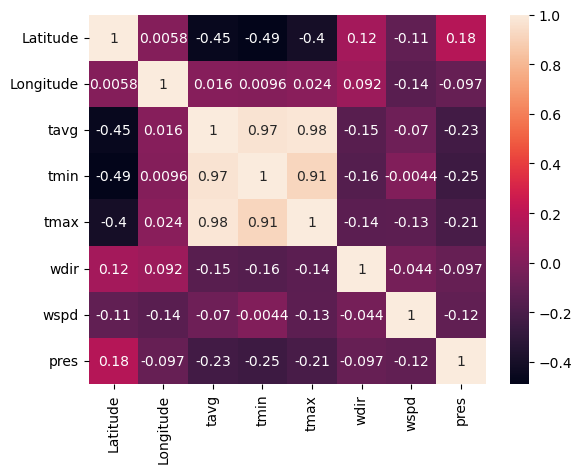

In [9]:
#Visualization of the relationship between columns
sns.heatmap(cor, annot=True);

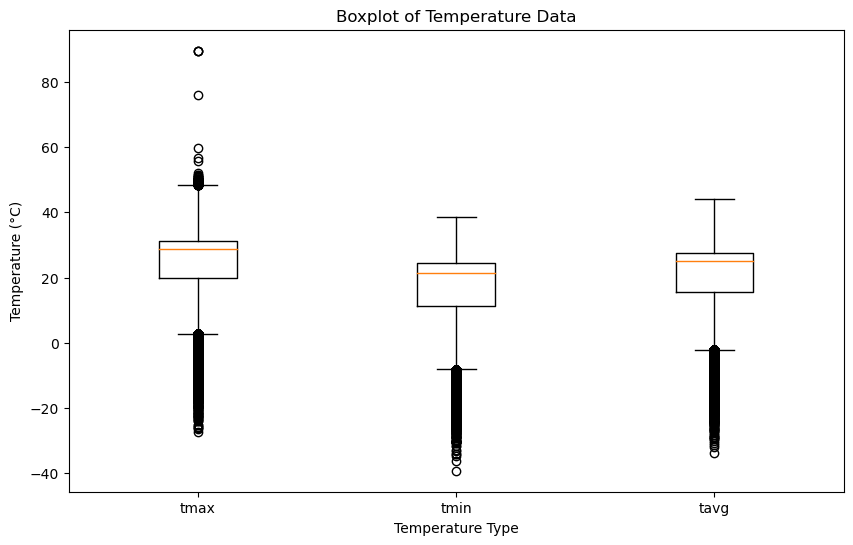

In [10]:
plt.figure(figsize=(10, 6))
plt.boxplot([weather['tmax'], weather['tmin'], weather['tavg']], labels=['tmax', 'tmin', 'tavg'])
plt.title('Boxplot of Temperature Data')
plt.xlabel('Temperature Type')
plt.ylabel('Temperature (°C)')
plt.show()

In [11]:
#Display temperature outliers

def find_outliers_IQR(weather):
    q1=weather.quantile(0.25)
    q3=weather.quantile(0.75)
    IQR=q3-q1
    outliers = weather[((weather<(q1-1.5*IQR)) | (weather>(q3+1.5*IQR)))]
    return outliers

outliers = find_outliers_IQR(weather["tavg"])

print("number of outliers: "+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 5949
max outlier value: -2.3
min outlier value: -33.8


1552     -2.9
1553     -4.8
1560     -4.1
1561     -4.9
1562     -5.6
         ... 
312168   -4.3
312169   -4.6
312174   -3.0
312176   -2.6
312177   -4.8
Name: tavg, Length: 5949, dtype: float64

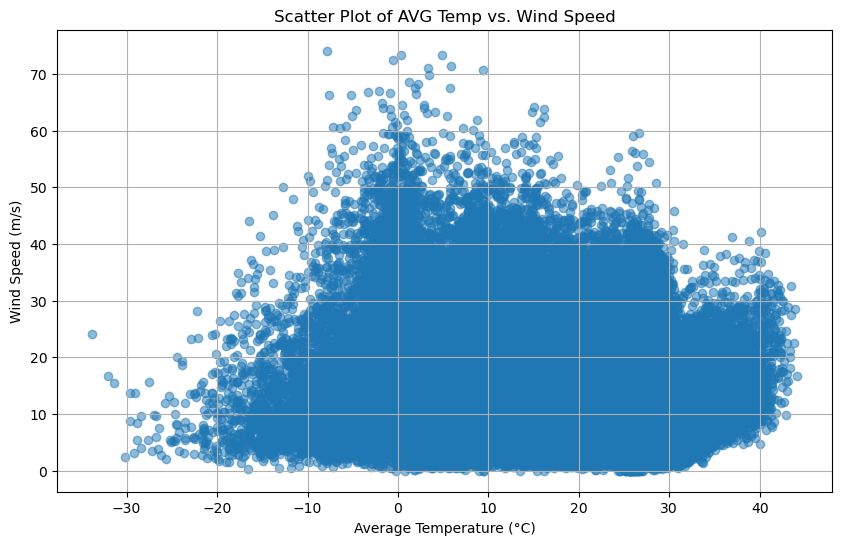

In [12]:
#The relationship between average temperature and wind speed
plt.figure(figsize=(10, 6))
plt.scatter(weather['tavg'], weather['wspd'], alpha=0.5)
plt.title('Scatter Plot of AVG Temp vs. Wind Speed')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()

In [13]:
num_countries = weather['country'].nunique()

print(f'The dataset contains {num_countries} unique countries.')

The dataset contains 194 unique countries.


In [14]:
#weather.to_csv('final_weather_data.csv', index=False)

In [15]:
#weather['country'].value_counts().sort_values(ascending=False)

In [16]:
!pip install prophet

Defaulting to user installation because normal site-packages is not writeable


12:12:34 - cmdstanpy - INFO - Chain [1] start processing
12:14:28 - cmdstanpy - INFO - Chain [1] done processing


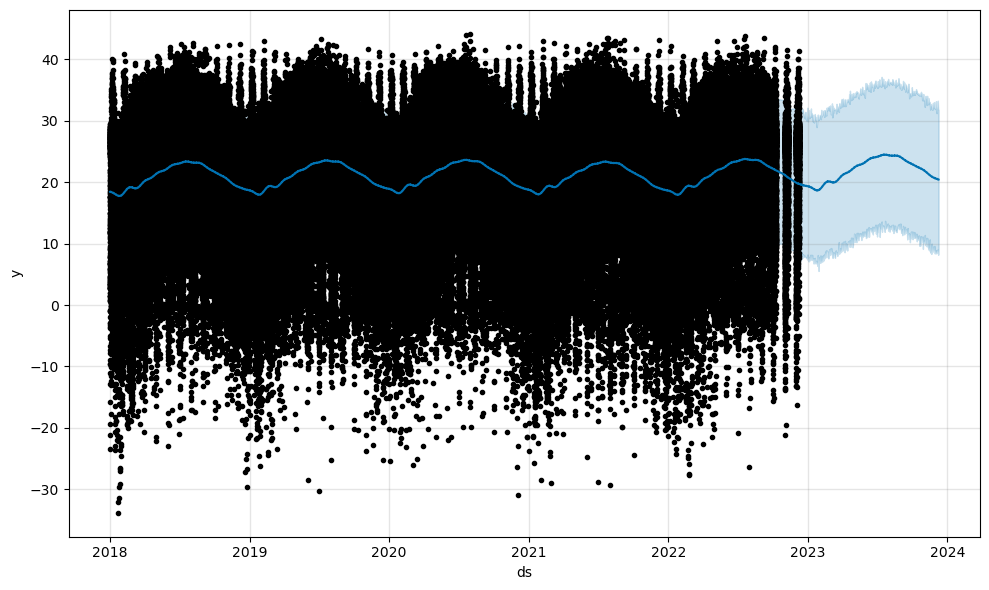

In [17]:
from prophet import Prophet

# Renaming the columns to match Prophet's requirements
temperature_data = weather.rename(columns={'date': 'ds', 'tavg': 'y'})

# Initializing the Prophet model
model = Prophet()

# Fitting the model the dataframe
model.fit(temperature_data)

# Creating a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=365)  # Predicting one year into the future

# Temperature predictions for future dates
forecast = model.predict(future)

# Visualizing the forecast
fig = model.plot(forecast)